# Example for a simple neural network

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Output function

We have to encode the output somehow, for two classes, the simplest solution is a single variable that should be 0 if there are more cards of color 0 and 1 if there are more cards of color 1.

### Training and label data.

So we can prepare some training data. In this simple case, all the possible configurations are actually known.


In [2]:
# Input x: All the combinations of how two colours can be distributed on 5 cards.
x_train = np.array([
    [0, 5],
    [1, 4],
    [2, 3],
    [3, 2],
    [4, 1],
    [5, 0],
], dtype=np.float32)
# Outputresult: 1 is for first colour to be chosen as trump, 0 is for second colour to be chosen as trump.
y_train = np.array([1, 1, 1, 0, 0, 0,], dtype=np.float32)
print(x_train)
print(y_train)

[[0. 5.]
 [1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]
 [5. 0.]]
[1. 1. 1. 0. 0. 0.]


### Normalisation

Input data can have different ranges. It is always a good idea (in other words absolutely essential) to normalize the input data. This is usually done into the range 0..1 or -1..1

In [3]:
x_train = x_train / 5.0
print(x_train)

[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]


### A first network.

We will start with a very simple network, where we connect the inputs directly to the output. So there will be 2 variables, the weights for the connection and the bias. The output function is a sigmoid, which takes values between 0 and 1.

With keras, we first have to create the type of model we want (Sequential), and can then add layers. In the tensorflow implementation, we have to add the input_shape parameter in the first layer to tell it the format of the input. This does not include the batch dimension.

In [4]:
#A model which takes a linear stack of layers.
model = keras.Sequential()
# A dense layer: every input node is connected with every outputnode. The input is a 2D-vector, eg. [0,5]
# The direct way to add the input layer is depreceated --> better to use model.Input(shape=[2])
model.add(keras.Input(shape=[2]))
# The output is a number (1-dimension) which gives the probability of hitting the y-output.
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=[2]))

Next we have to compile the model and tell it what loss function and optimizer we want to have. We will take a mean squared error for loss function first. (This is actually not optimal and will be corrected in an exercise).

Besides the loss, we usually want to look at some metrics. Here we choose accurary, that measures how often the network makes the correct decision (see last lecture).

In [5]:

#Defines the criteria on how the model is optimised.
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])


We can print some details about the model.

In [6]:
model.summary()
print(model.get_weights())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[array([[-0.48070568],
       [-0.733546  ]], dtype=float32), array([0.], dtype=float32)]


We can either train one batch, or we can use fit to train repeatedly. The result from the training is the loss function and the metric.

In [7]:
model.train_on_batch(x_train, y_train)

[0.28931334614753723, 0.5]

We can now try to fit the data in minibatches multiple times. This will calculate the weights, so as to minimize the loss. We might not always get a good result in the first try and even this very simple network seems to need a large number of training steps.

In [8]:
# The small input dataset will be split up into batches. Here each batch has the size of 6. 
# This is basically exactly the size of our training data. --> we have one batch of size 6.
# Therefore, we train the model here over the same data over and over again (each epoch).
model.fit(x_train, y_train, epochs=50, batch_size=6)

Epoch 1/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2892 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 0s/step - loss: 0.2890 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 999us/step - loss: 0.2882 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 999us/step - loss: 0.2881 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 0s/step - loss: 0.2879 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 999us/step - loss: 0.2877 - accuracy: 0.5000
Epoch 11/50
1/1 [==================

We can predict the values from the training value. Why are the results floating point number and not 0 or 1? Does the result seem likely?

In [9]:
# The result should be [1,1,1,0,0,0].
# Each epoch the model is trained with the same data. If we are already in a local
# minimum, which is not optimal, the same data will not change the weights...

model.predict(x_train)

array([[0.34279215],
       [0.35096502],
       [0.35922623],
       [0.36757177],
       [0.3759974 ],
       [0.38449875]], dtype=float32)

We can also print the found weights for each layer:

In [10]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer.name)
    print(weights)

dense
[array([[-0.50145626],
       [-0.68183583]], dtype=float32), array([0.03095977], dtype=float32)]


How do we find the actual predictions? We use a threshold on the output of the sigmoid function.

In [11]:
model.predict(x_train) > 0.5

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False]])

### A larger network

Lets try a more complicated network with two hidden layers.

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=[2]))
# However, relu does not change really anything, since all input is >0
# so I guess the input is the same for the sigmoid.The relu-layers give some 
# additional weights, which seems, with many epochs, to help to refine the output.
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

And train it again...

In [13]:
model.fit(x_train, y_train, epochs=100, batch_size=6)

Epoch 1/100
1/1 [==============================] - 0s 997us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 999us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 1000us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 1000us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 11/100
1/1 [=

1/1 [==============================] - 0s 999us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 85/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 86/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 87/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.2500 - accuracy: 0.5000
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.2500 - accuracy: 0.5000
Epoch 90/100
1/1 [==============================] - 0s 998us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 92/100
1/1 [==============================] - 0s 1000us/step - loss: 0.2500 - accuracy: 0.5000
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.2500 - accuracy: 0.5000
Epoch 94/100
1/1 [===========

The results are not necessarly better, how does the prediction look now?

In [14]:
model.predict(x_train)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [15]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer)
    print(weights)

[array([[-1.1297853, -0.5235271],
       [-1.1350611, -0.3731423]], dtype=float32), array([0., 0.], dtype=float32)]
[array([[ 1.2035047 ,  0.05580592],
       [-0.48381686, -0.66784024]], dtype=float32), array([0., 0.], dtype=float32)]
[array([[-0.95569664],
       [ 0.8953012 ]], dtype=float32), array([0.], dtype=float32)]


The larger network, does not seem to work better as the simpler one. Or is it maybe not large enough?

The problem is not the network, but the data, we just do not have enough data. So lets try to make up some more data artificially.


In [16]:
x_0 = np.random.random(size=(10000))
x_1 = np.ones(shape=10000) - x_0
# basically we random create tuples with [x, 1-x]
# some of these value-combinations can practically only be achieved, if we had much more than 5 cards
# e.g. [0.9,0.1] for the colour distribution [9,1] in case of 10 cards.
x_new = np.stack([x_0, x_1], axis=1)
print(x_new)

[[0.07041532 0.92958468]
 [0.01534069 0.98465931]
 [0.67938608 0.32061392]
 ...
 [0.85991049 0.14008951]
 [0.46611902 0.53388098]
 [0.4182461  0.5817539 ]]


In [17]:
y_new = np.zeros(10000, dtype=np.float32)
condition = (x_new[:,1] > x_new[:,0])
# If color 2 has more cards than color 1 set 1.0, else it will remain 0
y_new[condition] = 1.0

In [18]:
print(x_new, y_new)

[[0.07041532 0.92958468]
 [0.01534069 0.98465931]
 [0.67938608 0.32061392]
 ...
 [0.85991049 0.14008951]
 [0.46611902 0.53388098]
 [0.4182461  0.5817539 ]] [1. 1. 0. ... 0. 1. 1.]


In [19]:
model.fit(x_new, y_new, epochs=10, batch_size=100)

Epoch 1/10
100/100 [==============================] - 0s 970us/step - loss: 0.2500 - accuracy: 0.4955
Epoch 2/10
100/100 [==============================] - 0s 948us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 3/10
100/100 [==============================] - 0s 977us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 4/10
100/100 [==============================] - 0s 978us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 5/10
100/100 [==============================] - 0s 987us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 6/10
100/100 [==============================] - 0s 985us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 7/10
100/100 [==============================] - 0s 978us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 8/10
100/100 [==============================] - 0s 985us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 9/10
100/100 [==============================] - 0s 997us/step - loss: 0.2500 - accuracy: 0.5023
Epoch 10/10
100/100 [==============================] - 0s 1ms/step - loss: 0.2500 

That seems better. Lets look how it performs on our original data.

In [20]:
model.predict(x_train)

array([[0.50161004],
       [0.50161004],
       [0.50161004],
       [0.50161004],
       [0.50161004],
       [0.50161004]], dtype=float32)

### Evaluation

We might want to check how the network performs on any data. For this, keras provides the evaluate function that will 
evaluate the loss and the metrics. So of course label (y) data is needed for that. 

In [21]:
model.evaluate(x_new, y_new)

313/313 [==============================] - 0s 540us/step - loss: 0.2500 - accuracy: 0.5023


[0.24999524652957916, 0.5023000240325928]

Of course, we would normally do that on validation or test data not used during training.

In [22]:
x_0 = np.random.random(size=(5000))
x_1 = np.ones(shape=5000) - x_0
x_val_new = np.stack([x_0, x_1], axis=1)
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:,1] > x_val_new[:,0]] = 1.0
model.evaluate(x_val_new, y_val_new)

157/157 [==============================] - 0s 752us/step - loss: 0.2500 - accuracy: 0.5022


[0.24999548494815826, 0.5022000074386597]

### Visualisation

It is essential to visualise the training process to see what is going on. In Keras, an easy method to do this is to use the history object that is returned from fit. It contains the metrics and the loss.

We will also split our data into training and validation for this test. We rebuild the model, so that it is initialized again. Otherwise we would just continue with the weights from the previous fit.

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
75/75 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.5032 - val_loss: 0.2486 - val_accuracy: 0.4812
Epoch 2/300
75/75 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.5032 - val_loss: 0.2484 - val_accuracy: 0.4812
Epoch 3/300
75/75 [==============================] - 0s 960us/step - loss: 0.2481 - accuracy: 0.5032 - val_loss: 0.2482 - val_accuracy: 0.4812
Epoch 4/300
75/75 [==============================] - 0s 920us/step - loss: 0.2479 - accuracy: 0.5032 - val_loss: 0.2480 - val_accuracy: 0.4812
Epoch 5/300
75/75 [==============================] - 0s 934us/step - loss: 0.2477 - accuracy: 0.5035 - val_loss: 0.2477 - val_accuracy: 0.4812
Epoch 6/300
75/75 [==============================] - 0s 956us/step - loss: 0.2474 - accuracy: 0.5076 - val_loss: 0.2475 - val_accuracy: 0.4872
Epoch 7/300
75/75 [==============================] - 0s 925us/step - loss: 0.2471 - accuracy: 0.5493 - val_loss: 0.2472 - val_accuracy: 0.5064
Epo

75/75 [==============================] - 0s 866us/step - loss: 0.0967 - accuracy: 0.9589 - val_loss: 0.0958 - val_accuracy: 0.9620
Epoch 59/300
75/75 [==============================] - 0s 905us/step - loss: 0.0935 - accuracy: 0.9632 - val_loss: 0.0927 - val_accuracy: 0.9632
Epoch 60/300
75/75 [==============================] - 0s 882us/step - loss: 0.0906 - accuracy: 0.9643 - val_loss: 0.0897 - val_accuracy: 0.9656
Epoch 61/300
75/75 [==============================] - 0s 859us/step - loss: 0.0878 - accuracy: 0.9667 - val_loss: 0.0870 - val_accuracy: 0.9676
Epoch 62/300
75/75 [==============================] - 0s 883us/step - loss: 0.0851 - accuracy: 0.9676 - val_loss: 0.0843 - val_accuracy: 0.9688
Epoch 63/300
75/75 [==============================] - 0s 910us/step - loss: 0.0826 - accuracy: 0.9697 - val_loss: 0.0818 - val_accuracy: 0.9700
Epoch 64/300
75/75 [==============================] - 0s 853us/step - loss: 0.0802 - accuracy: 0.9711 - val_loss: 0.0794 - val_accuracy: 0.9736
Epoch

Epoch 115/300
75/75 [==============================] - 0s 830us/step - loss: 0.0327 - accuracy: 0.9961 - val_loss: 0.0317 - val_accuracy: 0.9972
Epoch 116/300
75/75 [==============================] - 0s 857us/step - loss: 0.0323 - accuracy: 0.9955 - val_loss: 0.0313 - val_accuracy: 0.9972
Epoch 117/300
75/75 [==============================] - 0s 856us/step - loss: 0.0320 - accuracy: 0.9969 - val_loss: 0.0310 - val_accuracy: 0.9972
Epoch 118/300
75/75 [==============================] - 0s 861us/step - loss: 0.0316 - accuracy: 0.9963 - val_loss: 0.0306 - val_accuracy: 0.9972
Epoch 119/300
75/75 [==============================] - 0s 882us/step - loss: 0.0313 - accuracy: 0.9971 - val_loss: 0.0303 - val_accuracy: 0.9972
Epoch 120/300
75/75 [==============================] - 0s 883us/step - loss: 0.0310 - accuracy: 0.9975 - val_loss: 0.0300 - val_accuracy: 0.9972
Epoch 121/300
75/75 [==============================] - 0s 883us/step - loss: 0.0307 - accuracy: 0.9972 - val_loss: 0.0297 - val_ac

75/75 [==============================] - 0s 854us/step - loss: 0.0207 - accuracy: 0.9992 - val_loss: 0.0199 - val_accuracy: 0.9988
Epoch 172/300
75/75 [==============================] - 0s 853us/step - loss: 0.0206 - accuracy: 0.9993 - val_loss: 0.0198 - val_accuracy: 0.9976
Epoch 173/300
75/75 [==============================] - 0s 875us/step - loss: 0.0205 - accuracy: 0.9985 - val_loss: 0.0196 - val_accuracy: 0.9980
Epoch 174/300
75/75 [==============================] - 0s 880us/step - loss: 0.0204 - accuracy: 0.9989 - val_loss: 0.0195 - val_accuracy: 0.9980
Epoch 175/300
75/75 [==============================] - 0s 909us/step - loss: 0.0203 - accuracy: 0.9992 - val_loss: 0.0194 - val_accuracy: 0.9980
Epoch 176/300
75/75 [==============================] - 0s 893us/step - loss: 0.0201 - accuracy: 0.9985 - val_loss: 0.0193 - val_accuracy: 0.9984
Epoch 177/300
75/75 [==============================] - 0s 987us/step - loss: 0.0200 - accuracy: 0.9989 - val_loss: 0.0192 - val_accuracy: 0.9988

Epoch 228/300
75/75 [==============================] - 0s 872us/step - loss: 0.0156 - accuracy: 0.9995 - val_loss: 0.0149 - val_accuracy: 0.9984
Epoch 229/300
75/75 [==============================] - 0s 873us/step - loss: 0.0155 - accuracy: 0.9985 - val_loss: 0.0148 - val_accuracy: 0.9996
Epoch 230/300
75/75 [==============================] - 0s 896us/step - loss: 0.0155 - accuracy: 0.9996 - val_loss: 0.0147 - val_accuracy: 0.9996
Epoch 231/300
75/75 [==============================] - 0s 888us/step - loss: 0.0154 - accuracy: 0.9997 - val_loss: 0.0147 - val_accuracy: 0.9992
Epoch 232/300
75/75 [==============================] - 0s 864us/step - loss: 0.0154 - accuracy: 0.9997 - val_loss: 0.0146 - val_accuracy: 0.9988
Epoch 233/300
75/75 [==============================] - 0s 876us/step - loss: 0.0153 - accuracy: 0.9996 - val_loss: 0.0146 - val_accuracy: 0.9988
Epoch 234/300
75/75 [==============================] - 0s 873us/step - loss: 0.0152 - accuracy: 0.9995 - val_loss: 0.0145 - val_ac

75/75 [==============================] - 0s 877us/step - loss: 0.0128 - accuracy: 0.9997 - val_loss: 0.0121 - val_accuracy: 0.9996
Epoch 285/300
75/75 [==============================] - 0s 919us/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9992
Epoch 286/300
75/75 [==============================] - 0s 791us/step - loss: 0.0127 - accuracy: 0.9995 - val_loss: 0.0121 - val_accuracy: 0.9996
Epoch 287/300
75/75 [==============================] - 0s 852us/step - loss: 0.0127 - accuracy: 0.9997 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 288/300
75/75 [==============================] - 0s 891us/step - loss: 0.0127 - accuracy: 0.9996 - val_loss: 0.0120 - val_accuracy: 0.9996
Epoch 289/300
75/75 [==============================] - 0s 886us/step - loss: 0.0126 - accuracy: 0.9997 - val_loss: 0.0120 - val_accuracy: 0.9996
Epoch 290/300
75/75 [==============================] - 0s 893us/step - loss: 0.0126 - accuracy: 0.9997 - val_loss: 0.0119 - val_accuracy: 0.9992

In [24]:
# Only with an increase of the epoch the results improved
model.predict(x_train)

array([[9.3519330e-01],
       [9.3519330e-01],
       [9.3519330e-01],
       [2.1820128e-02],
       [1.2027707e-05],
       [6.4852159e-09]], dtype=float32)

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'loss')

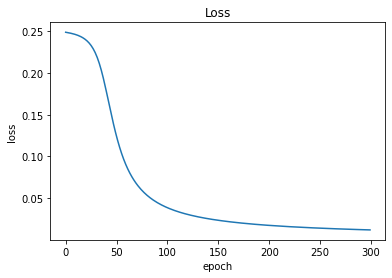

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

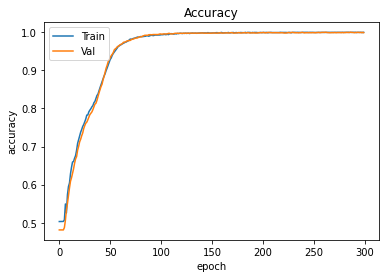

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

In [28]:
# How does the model perform with many data and the original layers?
x_0 = np.random.random(size=(5000))
x_1 = np.ones(shape=5000) - x_0
x_val_new = np.stack([x_0, x_1], axis=1)
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:,1] > x_val_new[:,0]] = 1.0

model = keras.Sequential()
model.add(keras.Input(shape=[2]))
# However, relu does not change really anything, since all input is >0
# so I guess the input is the same for the sigmoid.
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_val_new, y_val_new, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
38/38 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.5045 - val_loss: 0.2380 - val_accuracy: 0.4984
Epoch 2/300
38/38 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.5045 - val_loss: 0.2338 - val_accuracy: 0.4984
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.5045 - val_loss: 0.2298 - val_accuracy: 0.4984
Epoch 4/300
38/38 [==============================] - 0s 1ms/step - loss: 0.2258 - accuracy: 0.5045 - val_loss: 0.2261 - val_accuracy: 0.4984
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.5045 - val_loss: 0.2225 - val_accuracy: 0.4984
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.5051 - val_loss: 0.2191 - val_accuracy: 0.5064
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.5437 - val_loss: 0.2159 - val_accuracy: 0.5552
Epoch 8/300
3

Epoch 59/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9947 - val_loss: 0.1369 - val_accuracy: 0.9976
Epoch 60/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9952 - val_loss: 0.1361 - val_accuracy: 0.9976
Epoch 61/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9963 - val_loss: 0.1353 - val_accuracy: 0.9976
Epoch 62/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9960 - val_loss: 0.1345 - val_accuracy: 0.9976
Epoch 63/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9960 - val_loss: 0.1337 - val_accuracy: 0.9976
Epoch 64/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9960 - val_loss: 0.1329 - val_accuracy: 0.9976
Epoch 65/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1298 - accuracy: 0.9965 - val_loss: 0.1321 - val_accuracy: 0.9976
Epoch 

38/38 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9987 - val_loss: 0.1043 - val_accuracy: 0.9984
Epoch 117/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9989 - val_loss: 0.1039 - val_accuracy: 0.9984
Epoch 118/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9989 - val_loss: 0.1035 - val_accuracy: 0.9984
Epoch 119/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.9989 - val_loss: 0.1032 - val_accuracy: 0.9984
Epoch 120/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9992 - val_loss: 0.1028 - val_accuracy: 0.9984
Epoch 121/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9989 - val_loss: 0.1024 - val_accuracy: 0.9984
Epoch 122/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9992 - val_loss: 0.1021 - val_accuracy: 0.9984
Epoch 123/300

38/38 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9995 - val_loss: 0.0877 - val_accuracy: 0.9984
Epoch 174/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9997 - val_loss: 0.0875 - val_accuracy: 0.9984
Epoch 175/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9995 - val_loss: 0.0873 - val_accuracy: 0.9984
Epoch 176/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9992 - val_loss: 0.0870 - val_accuracy: 0.9984
Epoch 177/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9995 - val_loss: 0.0868 - val_accuracy: 0.9984
Epoch 178/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9995 - val_loss: 0.0866 - val_accuracy: 0.9984
Epoch 179/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9997 - val_loss: 0.0864 - val_accuracy: 0.9984
Epoch 180/300

38/38 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9995 - val_loss: 0.0775 - val_accuracy: 0.9992
Epoch 231/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9995 - val_loss: 0.0774 - val_accuracy: 0.9984
Epoch 232/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9997 - val_loss: 0.0772 - val_accuracy: 0.9992
Epoch 233/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9997 - val_loss: 0.0771 - val_accuracy: 0.9992
Epoch 234/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9997 - val_loss: 0.0770 - val_accuracy: 0.9992
Epoch 235/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9997 - val_loss: 0.0768 - val_accuracy: 0.9992
Epoch 236/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9997 - val_loss: 0.0767 - val_accuracy: 0.9992
Epoch 237/300

38/38 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9997 - val_loss: 0.0706 - val_accuracy: 0.9992
Epoch 288/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9997 - val_loss: 0.0705 - val_accuracy: 0.9992
Epoch 289/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9997 - val_loss: 0.0704 - val_accuracy: 0.9992
Epoch 290/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9997 - val_loss: 0.0703 - val_accuracy: 0.9984
Epoch 291/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9997 - val_loss: 0.0702 - val_accuracy: 0.9984
Epoch 292/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9997 - val_loss: 0.0701 - val_accuracy: 0.9984
Epoch 293/300
38/38 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9995 - val_loss: 0.0700 - val_accuracy: 0.9992
Epoch 294/300

In [29]:
# The additional ReLu-Layers seem to make a difference in the quality of the result.
model.predict(x_train)

array([[0.9466989 ],
       [0.84926796],
       [0.64123255],
       [0.36182874],
       [0.15244016],
       [0.05397525]], dtype=float32)

## Exercise: Correct loss function

The loss function used above (mse) is not optimal. A better loss function would be the crossentropy. Change the network to use that loss function.

In [30]:
# How does the model perform with many data and the original layers?
x_0 = np.random.random(size=(5000))
x_1 = np.ones(shape=5000) - x_0
x_val_new = np.stack([x_0, x_1], axis=1)
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:,1] > x_val_new[:,0]] = 1.0

model = keras.Sequential()
model.add(keras.Input(shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Binary crossentropy works only if we have two categories
loss_fn = keras.losses.BinaryCrossentropy()
model.compile(loss= loss_fn,
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_val_new, y_val_new, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
38/38 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4808
Epoch 2/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.4808
Epoch 3/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6932 - val_accuracy: 0.4808
Epoch 4/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4808
Epoch 5/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4808
Epoch 6/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4808
Epoch 7/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4808
Epoch 8/300
3

Epoch 59/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 60/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 61/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 62/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 63/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 64/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 65/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 

38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 117/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 118/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 119/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 120/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 121/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 122/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 123/300

38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 174/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 175/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 176/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 177/300
38/38 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 178/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 179/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 180/300

38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 231/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 232/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 233/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 234/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 235/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 236/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 237/300

38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 288/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 289/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 290/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 291/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 292/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 293/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4808
Epoch 294/300

In [31]:
# Only with an increase of the epoch the results improved
model.predict(x_train)

array([[0.49589917],
       [0.49589917],
       [0.49589917],
       [0.49589917],
       [0.49589917],
       [0.49589917]], dtype=float32)

Text(0, 0.5, 'loss')

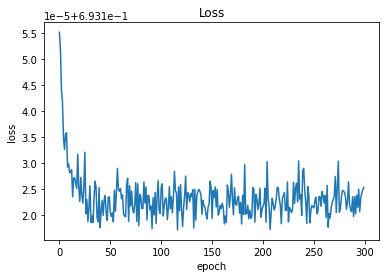

In [32]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

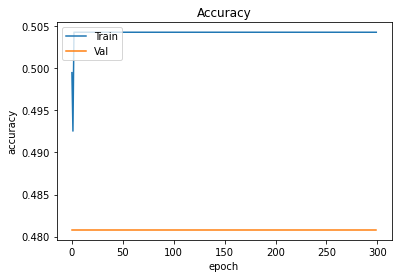

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Maximum of 4 colors

Implement a network that will receive 4 colors and has to select one of them.

This will require a change of the labels (y) that now take values of 0, 1, 2 or 3. However, networks do not use labels in that form directly for multi class classification, but use 1-hot encoded or categorical data instead.

In keras there is a function `keras.utils.to_categorical` that can be used for that.

The last layer in the network should then no longer be sigmoid, but the softmax function. And we need the multiclass form of the crossentropy function, which in keras is called `categorical_crossentropy`.


In [37]:
# see: https://www.machinecurve.com/index.php/2019/10/22/how-to-use-binary-categorical-crossentropy-with-keras/#binary-crossentropy-for-binary-classification

from tensorflow.keras.utils import to_categorical
loss_function_used = 'categorical_crossentropy'

# 5000 quadtruple vectors
x_train= np.random.random(size=(5,4))
# print(x_train)
# The colour with the maximum cards should be chosen as trump
# The trumpvalue: the index of the column with the max value for each row (axis=0)
y_train_label = np.argmax(x_train, axis=1)
# The integernumbers of the category are hot encoded
y_train_categorical= to_categorical(y_train_label)
print(x_train)
print(y_train_label)
print(y_train_categorical)


[[0.39308184 0.90106928 0.89352332 0.79420884]
 [0.10509787 0.14938653 0.62006765 0.84303125]
 [0.00804328 0.70963369 0.10017055 0.45523265]
 [0.96931897 0.41272961 0.5735195  0.19918807]
 [0.33752051 0.40660834 0.06209964 0.27496058]]
[1 3 1 0 1]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [38]:
model = keras.Sequential()
# The input shape is now 4 instead of 2
model.add(keras.Input(shape=[4]))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
#Sigmoid cannot be used, since it provides only a classification between 0 and 1
#--> softmax
# The output has now 4 classifications instead of 1
model.add(keras.layers.Dense(4, activation='softmax'))
model.compile(loss= loss_function_used,
              optimizer='sgd',
              metrics=['accuracy'])
# Model is trained on only 0.75 of the training data. 0.25 will be used for validation after each epoch.
# In each epoch a batch with size 100 is extracted from the 0.75 training data for training.
history = model.fit(x_train, y_train_categorical, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
1/1 [==============================] - 0s 131ms/step - loss: 1.3863 - accuracy: 0.0000e+00 - val_loss: 1.3589 - val_accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 1.3832 - accuracy: 0.6667 - val_loss: 1.3581 - val_accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 25ms/step - loss: 1.3802 - accuracy: 0.6667 - val_loss: 1.3573 - val_accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 21ms/step - loss: 1.3772 - accuracy: 0.6667 - val_loss: 1.3566 - val_accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 21ms/step - loss: 1.3742 - accuracy: 0.6667 - val_loss: 1.3558 - val_accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 25ms/step - loss: 1.3712 - accuracy: 0.6667 - val_loss: 1.3550 - val_accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 23ms/step - loss: 1.3682 - accuracy: 0.6667 - val_loss: 1.3543 - val_accuracy: 0.5000
Epoch 8/300
1/1

1/1 [==============================] - 0s 25ms/step - loss: 1.2327 - accuracy: 0.6667 - val_loss: 1.3277 - val_accuracy: 0.5000
Epoch 60/300
1/1 [==============================] - 0s 25ms/step - loss: 1.2305 - accuracy: 0.6667 - val_loss: 1.3274 - val_accuracy: 0.5000
Epoch 61/300
1/1 [==============================] - 0s 19ms/step - loss: 1.2282 - accuracy: 0.6667 - val_loss: 1.3271 - val_accuracy: 0.5000
Epoch 62/300
1/1 [==============================] - 0s 19ms/step - loss: 1.2260 - accuracy: 0.6667 - val_loss: 1.3268 - val_accuracy: 0.5000
Epoch 63/300
1/1 [==============================] - 0s 18ms/step - loss: 1.2238 - accuracy: 0.6667 - val_loss: 1.3265 - val_accuracy: 0.5000
Epoch 64/300
1/1 [==============================] - 0s 18ms/step - loss: 1.2216 - accuracy: 0.6667 - val_loss: 1.3263 - val_accuracy: 0.5000
Epoch 65/300
1/1 [==============================] - 0s 20ms/step - loss: 1.2194 - accuracy: 0.6667 - val_loss: 1.3260 - val_accuracy: 0.5000
Epoch 66/300
1/1 [========

1/1 [==============================] - 0s 18ms/step - loss: 1.1196 - accuracy: 0.6667 - val_loss: 1.3207 - val_accuracy: 0.5000
Epoch 118/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1179 - accuracy: 0.6667 - val_loss: 1.3208 - val_accuracy: 0.5000
Epoch 119/300
1/1 [==============================] - 0s 21ms/step - loss: 1.1162 - accuracy: 0.6667 - val_loss: 1.3208 - val_accuracy: 0.5000
Epoch 120/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1146 - accuracy: 0.6667 - val_loss: 1.3209 - val_accuracy: 0.5000
Epoch 121/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1130 - accuracy: 0.6667 - val_loss: 1.3210 - val_accuracy: 0.5000
Epoch 122/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1113 - accuracy: 0.6667 - val_loss: 1.3210 - val_accuracy: 0.5000
Epoch 123/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1097 - accuracy: 0.6667 - val_loss: 1.3211 - val_accuracy: 0.5000
Epoch 124/300
1/1 [=

Epoch 175/300
1/1 [==============================] - 0s 17ms/step - loss: 1.0364 - accuracy: 0.6667 - val_loss: 1.3304 - val_accuracy: 0.5000
Epoch 176/300
1/1 [==============================] - 0s 20ms/step - loss: 1.0351 - accuracy: 0.6667 - val_loss: 1.3306 - val_accuracy: 0.5000
Epoch 177/300
1/1 [==============================] - 0s 18ms/step - loss: 1.0339 - accuracy: 0.6667 - val_loss: 1.3309 - val_accuracy: 0.5000
Epoch 178/300
1/1 [==============================] - 0s 18ms/step - loss: 1.0327 - accuracy: 0.6667 - val_loss: 1.3312 - val_accuracy: 0.5000
Epoch 179/300
1/1 [==============================] - 0s 19ms/step - loss: 1.0315 - accuracy: 0.6667 - val_loss: 1.3315 - val_accuracy: 0.5000
Epoch 180/300
1/1 [==============================] - 0s 16ms/step - loss: 1.0303 - accuracy: 0.6667 - val_loss: 1.3317 - val_accuracy: 0.5000
Epoch 181/300
1/1 [==============================] - 0s 18ms/step - loss: 1.0291 - accuracy: 0.6667 - val_loss: 1.3320 - val_accuracy: 0.5000
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 21ms/step - loss: 0.9747 - accuracy: 0.6667 - val_loss: 1.3505 - val_accuracy: 0.5000
Epoch 234/300
1/1 [==============================] - 0s 19ms/step - loss: 0.9738 - accuracy: 0.6667 - val_loss: 1.3509 - val_accuracy: 0.5000
Epoch 235/300
1/1 [==============================] - 0s 21ms/step - loss: 0.9729 - accuracy: 0.6667 - val_loss: 1.3513 - val_accuracy: 0.5000
Epoch 236/300
1/1 [==============================] - 0s 20ms/step - loss: 0.9720 - accuracy: 0.6667 - val_loss: 1.3517 - val_accuracy: 0.5000
Epoch 237/300
1/1 [==============================] - 0s 25ms/step - loss: 0.9710 - accuracy: 0.6667 - val_loss: 1.3522 - val_accuracy: 0.5000
Epoch 238/300
1/1 [==============================] - 0s 20ms/step - loss: 0.9702 - accuracy: 0.6667 - val_loss: 1.3526 - val_accuracy: 0.5000
Epoch 239/300
1/1 [==============================] - 0s 23ms/step - loss: 0.9693 - accuracy: 0.6667 - val_loss: 1.3530 - val_accuracy: 0.5000
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 21ms/step - loss: 0.9282 - accuracy: 0.6667 - val_loss: 1.3769 - val_accuracy: 0.5000
Epoch 292/300
1/1 [==============================] - 0s 22ms/step - loss: 0.9275 - accuracy: 0.6667 - val_loss: 1.3774 - val_accuracy: 0.5000
Epoch 293/300
1/1 [==============================] - 0s 19ms/step - loss: 0.9268 - accuracy: 0.6667 - val_loss: 1.3778 - val_accuracy: 0.5000
Epoch 294/300
1/1 [==============================] - 0s 18ms/step - loss: 0.9261 - accuracy: 0.6667 - val_loss: 1.3783 - val_accuracy: 0.5000
Epoch 295/300
1/1 [==============================] - 0s 21ms/step - loss: 0.9254 - accuracy: 0.6667 - val_loss: 1.3788 - val_accuracy: 0.5000
Epoch 296/300
1/1 [==============================] - 0s 20ms/step - loss: 0.9247 - accuracy: 0.6667 - val_loss: 1.3793 - val_accuracy: 0.5000
Epoch 297/300
1/1 [==============================] - 0s 21ms/step - loss: 0.9241 - accuracy: 0.6667 - val_loss: 1.3798 - val_accuracy: 0.5000
Epoch 

In [39]:
# In order to test the accuracy, we create a test set:
# 1000 quadtruple vectors
x_test= np.random.random(size=(5000,4))
# print(x_train)
# The colour with the maximum cards should be chosen as trump
# The trumpvalue: the index of the column with the max value for each row (axis=0)
y_test_label = np.argmax(x_test, axis=1)
# The integernumbers of the category are hot encoded
y_test_categorical= to_categorical(y_test_label)


model.evaluate(x_test,y_test_categorical)




157/157 [==============================] - 0s 685us/step - loss: 1.5484 - accuracy: 0.2552


[1.5484224557876587, 0.25519999861717224]

## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to get the trump from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the number of cards of a color as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [71]:
import pandas as pd
from pathlib import Path
# The path to the data-folder
path_to_data = Path('data')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None, nrows=10000)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
feature_columns = cards + forehand
data.drop('user', axis='columns', inplace=True)
data.head(5)



,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4


Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train

In [75]:
# From the "Trump prediction with ML"-notebook

# We recreate the feature columns, with less features

for color in 'DHSC':
    # We add a new column, which indicates, if a Jack+Nine combination exists
    # Jack and nine combination
    
    # The index name
    new_col = '{}_J9'.format(color)
    # Add the combination condition to the index
    data[new_col]  = data['{}J'.format(color)] & data['{}9'.format(color)]
    
    # Exercise: Add other features here such as the combination of Ace-King-Queen (Dreiblatt).
    
    # For Obe:
    # The index name
    new_col2 = '{}_HIGH'.format(color)
    # Add the combination condition to the index
    data[new_col2]  = data['{}A'.format(color)] & data['{}K'.format(color)] & data['{}K'.format(color)]
             
    # For Unde                                                 
    # The index name
    new_col3 = '{}_LOW'.format(color)
    # Add the combination condition to the index
    data[new_col3]  = data['{}6'.format(color)] & data['{}7'.format(color)] & data['{}8'.format(color)]   

# Oben bereinigen
new_colhigh = 'HIGH'
data[new_colhigh]=data['D_HIGH']
data.drop('D_HIGH', axis='columns', inplace=True)

for color in 'HSC':
    # Add the combination condition to the index
    # data[new_colhigh]  = data['{}_HIGH'.format(color)]
    data[new_colhigh]  = data[new_colhigh] | data['{}_HIGH'.format(color)]
    data.drop('{}_HIGH'.format(color), axis='columns', inplace=True)

data[new_colhigh] = data[new_colhigh] | (data['DA'.format(color)] & data['HA'.format(color)] & data['SA'.format(color)])
data[new_colhigh] = data[new_colhigh] | (data['DA'.format(color)] & data['HA'.format(color)] & data['CA'.format(color)])
data[new_colhigh] = data[new_colhigh] | (data['HA'.format(color)] & data['CA'.format(color)] & data['SA'.format(color)])

for color in 'HSC':
    # Add the combination condition to the index
    data[new_colhigh]  = data[new_colhigh] | (data['DA'.format(color)] & data['DK'.format(color)] & data['{}A'.format(color)])
    
for color in 'DSC':
    # Add the combination condition to the index
    data[new_colhigh]  = data[new_colhigh] | (data['HA'.format(color)] & data['HK'.format(color)] & data['{}A'.format(color)])
    
for color in 'HDC':
    # Add the combination condition to the index
    data[new_colhigh]  = data[new_colhigh] | (data['SA'.format(color)] & data['SK'.format(color)] & data['{}A'.format(color)])
    
for color in 'HDS':
    # Add the combination condition to the index
    data[new_colhigh]  = data[new_colhigh] | (data['CA'.format(color)] & data['CK'.format(color)] & data['{}A'.format(color)])

    
# Unten bereinigen
new_collow = 'LOW'
data[new_collow]=data['D_LOW']
data.drop('D_LOW', axis='columns', inplace=True)

for color in 'HSC':
    # Add the combination condition to the index
    data[new_collow]  = data[new_collow] | data['{}_LOW'.format(color)]
    data.drop('{}_LOW'.format(color), axis='columns', inplace=True)
    
data[new_collow] = data[new_collow] | (data['D6'.format(color)] & data['H6'.format(color)] & data['S6'.format(color)])
data[new_collow] = data[new_collow] | (data['D6'.format(color)] & data['H6'.format(color)] & data['C6'.format(color)])
data[new_collow] = data[new_collow] | (data['H6'.format(color)] & data['C6'.format(color)] & data['S6'.format(color)])

for color in 'HSC':
    # Add the combination condition to the index
    data[new_collow]  = data[new_collow] | (data['D6'.format(color)] & data['D7'.format(color)] & data['{}6'.format(color)])
    
for color in 'DSC':
    # Add the combination condition to the index
    data[new_collow]  = data[new_collow] | (data['H6'.format(color)] & data['H7'.format(color)] & data['{}6'.format(color)])
    
for color in 'HDC':
    # Add the combination condition to the index
    data[new_collow]  = data[new_collow] | (data['S6'.format(color)] & data['S7'.format(color)] & data['{}6'.format(color)])
    
for color in 'HDS':
    # Add the combination condition to the index
    data[new_collow]  = data[new_collow] | (data['C6'.format(color)] & data['C7'.format(color)] & data['{}6'.format(color)])


# data.tail(n=50)

featuresFrame = data.copy()

# Create output array
outputNumPy = featuresFrame['trump'].to_numpy()
outputNumPycategorical=to_categorical(outputNumPy)

# Create input array
featuresFrame.drop('trump', axis='columns', inplace=True)

for name in cards:
    featuresFrame.drop(name, axis='columns', inplace=True)

featuresFrame.head()
featuresNumPy= featuresFrame.to_numpy()
featureColumns= np.size(featuresNumPy,1)
categoryColumns= np.size(outputNumPycategorical,1)
print('featureColumns ' + str(featureColumns) )
print('categoryColumns ' + str(categoryColumns))
print('featureShape ' + str(featuresNumPy.shape) )
print('categoryShape ' + str(outputNumPycategorical.shape))
# print('outputMatrix ' + str(outputNumPy))
print('categoryMatrix ' + str(outputNumPycategorical))
# Reduce feature columns to the size of the category columns



featureColumns 7
categoryColumns 7
featureShape (10000, 7)
categoryShape (10000, 7)
categoryMatrix [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [76]:
modelCard = keras.Sequential()

# It seems that the number of features has to be equal to the number of categories.
# The input shape is now featureColumns instead of 2
modelCard.add(keras.Input(shape=[featureColumns]))
modelCard.add(keras.layers.Dense(featureColumns, activation='relu'))
modelCard.add(keras.layers.Dense(featureColumns, activation='relu'))
modelCard.add(keras.layers.Dense(featureColumns, activation='relu'))
modelCard.add(keras.layers.Dense(featureColumns, activation='relu'))
modelCard.add(keras.layers.Dense(categoryColumns, activation='softmax'))
#Sigmoid cannot be used, since it provides only a classification between 0 and 1
#--> softmax
# The output has now 7 (4 colours obe, unde and push) classifications instead of 1
modelCard.compile(loss= loss_function_used, optimizer='sgd',metrics=['accuracy'])
# Model is trained on only 0.75 of the training data. 0.25 will be used for validation after each epoch.
# In each epoch a batch with size 100 is extracted from the 0.75 training data for training.
history = modelCard.fit(featuresNumPy, outputNumPycategorical, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
75/75 [==============================] - 0s 3ms/step - loss: 1.9218 - accuracy: 0.3719 - val_loss: 1.8927 - val_accuracy: 0.4316
Epoch 2/300
75/75 [==============================] - 0s 1ms/step - loss: 1.8732 - accuracy: 0.4153 - val_loss: 1.8505 - val_accuracy: 0.3916
Epoch 3/300
75/75 [==============================] - 0s 1ms/step - loss: 1.8371 - accuracy: 0.3880 - val_loss: 1.8189 - val_accuracy: 0.3904
Epoch 4/300
75/75 [==============================] - 0s 1ms/step - loss: 1.8100 - accuracy: 0.3867 - val_loss: 1.7949 - val_accuracy: 0.3880
Epoch 5/300
75/75 [==============================] - 0s 1ms/step - loss: 1.7895 - accuracy: 0.3851 - val_loss: 1.7764 - val_accuracy: 0.3880
Epoch 6/300
75/75 [==============================] - 0s 1ms/step - loss: 1.7733 - accuracy: 0.3849 - val_loss: 1.7610 - val_accuracy: 0.3880
Epoch 7/300
75/75 [==============================] - 0s 1ms/step - loss: 1.7599 - accuracy: 0.3851 - val_loss: 1.7481 - val_accuracy: 0.3880
Epoch 8/300
7

75/75 [==============================] - 0s 915us/step - loss: 1.5271 - accuracy: 0.4765 - val_loss: 1.5127 - val_accuracy: 0.4892
Epoch 59/300
75/75 [==============================] - 0s 1ms/step - loss: 1.5234 - accuracy: 0.4764 - val_loss: 1.5088 - val_accuracy: 0.4892
Epoch 60/300
75/75 [==============================] - 0s 1ms/step - loss: 1.5201 - accuracy: 0.4765 - val_loss: 1.5053 - val_accuracy: 0.4892
Epoch 61/300
75/75 [==============================] - 0s 1ms/step - loss: 1.5168 - accuracy: 0.4765 - val_loss: 1.5016 - val_accuracy: 0.4892
Epoch 62/300
75/75 [==============================] - 0s 1ms/step - loss: 1.5135 - accuracy: 0.4765 - val_loss: 1.4983 - val_accuracy: 0.4892
Epoch 63/300
75/75 [==============================] - 0s 1ms/step - loss: 1.5104 - accuracy: 0.4765 - val_loss: 1.4948 - val_accuracy: 0.4892
Epoch 64/300
75/75 [==============================] - 0s 1ms/step - loss: 1.5075 - accuracy: 0.4765 - val_loss: 1.4917 - val_accuracy: 0.4892
Epoch 65/300
75/7

75/75 [==============================] - 0s 1ms/step - loss: 1.4525 - accuracy: 0.5073 - val_loss: 1.4324 - val_accuracy: 0.5196
Epoch 116/300
75/75 [==============================] - 0s 2ms/step - loss: 1.4520 - accuracy: 0.5073 - val_loss: 1.4312 - val_accuracy: 0.5192
Epoch 117/300
75/75 [==============================] - 0s 1ms/step - loss: 1.4512 - accuracy: 0.5075 - val_loss: 1.4304 - val_accuracy: 0.5192
Epoch 118/300
75/75 [==============================] - 0s 1ms/step - loss: 1.4503 - accuracy: 0.5075 - val_loss: 1.4298 - val_accuracy: 0.5192
Epoch 119/300
75/75 [==============================] - 0s 1ms/step - loss: 1.4495 - accuracy: 0.5075 - val_loss: 1.4287 - val_accuracy: 0.5192
Epoch 120/300
75/75 [==============================] - 0s 1ms/step - loss: 1.4488 - accuracy: 0.5083 - val_loss: 1.4277 - val_accuracy: 0.5200
Epoch 121/300
75/75 [==============================] - 0s 1ms/step - loss: 1.4481 - accuracy: 0.5083 - val_loss: 1.4270 - val_accuracy: 0.5200
Epoch 122/300

75/75 [==============================] - 0s 1ms/step - loss: 1.3817 - accuracy: 0.5256 - val_loss: 1.3593 - val_accuracy: 0.5376
Epoch 173/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3811 - accuracy: 0.5259 - val_loss: 1.3589 - val_accuracy: 0.5364
Epoch 174/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3800 - accuracy: 0.5267 - val_loss: 1.3594 - val_accuracy: 0.5384
Epoch 175/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3798 - accuracy: 0.5261 - val_loss: 1.3590 - val_accuracy: 0.5372
Epoch 176/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3793 - accuracy: 0.5255 - val_loss: 1.3565 - val_accuracy: 0.5376
Epoch 177/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3786 - accuracy: 0.5264 - val_loss: 1.3565 - val_accuracy: 0.5364
Epoch 178/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3778 - accuracy: 0.5271 - val_loss: 1.3585 - val_accuracy: 0.5384
Epoch 179/300

75/75 [==============================] - 0s 1ms/step - loss: 1.3610 - accuracy: 0.5324 - val_loss: 1.3389 - val_accuracy: 0.5408
Epoch 230/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3611 - accuracy: 0.5329 - val_loss: 1.3395 - val_accuracy: 0.5340
Epoch 231/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3605 - accuracy: 0.5335 - val_loss: 1.3400 - val_accuracy: 0.5448
Epoch 232/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3604 - accuracy: 0.5333 - val_loss: 1.3380 - val_accuracy: 0.5428
Epoch 233/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3603 - accuracy: 0.5316 - val_loss: 1.3376 - val_accuracy: 0.5448
Epoch 234/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3601 - accuracy: 0.5348 - val_loss: 1.3371 - val_accuracy: 0.5428
Epoch 235/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3597 - accuracy: 0.5349 - val_loss: 1.3381 - val_accuracy: 0.5456
Epoch 236/300

75/75 [==============================] - 0s 1ms/step - loss: 1.3503 - accuracy: 0.5348 - val_loss: 1.3301 - val_accuracy: 0.5472
Epoch 287/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3501 - accuracy: 0.5344 - val_loss: 1.3332 - val_accuracy: 0.5472
Epoch 288/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3502 - accuracy: 0.5351 - val_loss: 1.3317 - val_accuracy: 0.5444
Epoch 289/300
75/75 [==============================] - 0s 972us/step - loss: 1.3499 - accuracy: 0.5331 - val_loss: 1.3309 - val_accuracy: 0.5480
Epoch 290/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3500 - accuracy: 0.5309 - val_loss: 1.3313 - val_accuracy: 0.5444
Epoch 291/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3496 - accuracy: 0.5317 - val_loss: 1.3299 - val_accuracy: 0.5448
Epoch 292/300
75/75 [==============================] - 0s 1ms/step - loss: 1.3495 - accuracy: 0.5333 - val_loss: 1.3302 - val_accuracy: 0.5472
Epoch 293/3

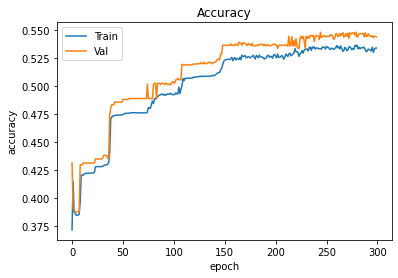

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')